In [90]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import requests
from time import sleep

#그래프 한글 오류 해결
from matplotlib import font_manager, rc

font_path = 'malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

In [91]:
df = pd.read_csv('csv/auto-mpg.csv')

df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [110]:
#python과 판다스가 부르는 type이 다르다.
diff = pd.DataFrame([['int','int64'],
                    ['float','float64'],
                    ['str','object']],
                   columns = ['python','pandas'],
                   index = ['정수','실수','문자열'])

In [111]:
df.shape #데이터프레임 크기를 출력해준다.

df.info() #열 이름과 각 열의 데이터 수량, 데이터타입.
#수량과 타입에 문제가 있나 확인. 변수에 저장이 안되는 단점.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   남북한별    8 non-null      object
 1   발전 전력별  8 non-null      object
 2   1990    8 non-null      object
 3   1991    8 non-null      object
 4   1992    8 non-null      object
 5   1993    8 non-null      object
 6   1994    8 non-null      object
 7   1995    8 non-null      object
 8   1996    8 non-null      object
 9   1997    8 non-null      object
 10  1998    8 non-null      object
 11  1999    8 non-null      object
 12  2000    8 non-null      object
 13  2001    8 non-null      object
 14  2002    8 non-null      object
 15  2003    8 non-null      object
 16  2004    8 non-null      object
 17  2005    8 non-null      object
 18  2006    8 non-null      object
 19  2007    8 non-null      object
 20  2008    8 non-null      int64 
 21  2009    8 non-null      object
 22  2010    8 non-null      object

In [112]:
df.count()  #각 열의 개수를 반환해준다.
df.count() - 398 #연산하여 볼수도 있다.
df.dtypes   #각 열의 타입을 반환해준다.
df.describe() #값이 숫자인 열에 대해 평균, 25%, 75%, 표준편차, 최대값, 최소값, 중간값을 표로 보여준다.

,2008,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,1119.875000,1327.750000,1348.000000,1359.000000,1367.750000,1410.750000,1442.500000,1488.875000,1464.250000,1431.375000,1502.250000,1549.625000
std,1566.915755,1926.282115,1965.719788,1955.344836,1974.843267,2015.616655,2080.915527,2168.880912,2107.922928,2030.804903,2127.175844,2159.609551
min,14.000000,77.000000,82.000000,78.000000,58.000000,66.000000,70.000000,73.000000,62.000000,71.000000,67.000000,73.000000
25%,99.500000,84.500000,109.500000,119.000000,97.500000,123.750000,118.250000,126.250000,123.500000,124.000000,144.250000,149.000000
50%,198.000000,175.000000,180.000000,183.500000,181.500000,217.500000,239.000000,265.000000,275.500000,275.000000,323.000000,368.500000
75%,1793.750000,1984.750000,1936.250000,2029.750000,2086.500000,2095.500000,2047.500000,2005.750000,2037.750000,2068.000000,2110.500000,2225.250000
max,4224.000000,5096.000000,5171.000000,5220.000000,5281.000000,5404.000000,5535.000000,5706.000000,5630.000000,5522.000000,5768.000000,5944.000000


In [109]:
columns =['mpg','cylinders','weight','acceleration']

median = df[columns].mean()  
#열 인덱싱하지않으면 문자열값을 가진 열(인덱스명)때문에 에러발생.

min = df[columns].min()
max = df[columns].max()

df['mpg'].mean()
df[['mpg','weight']].mean()
#원소단위 적용

pd.DataFrame({'mix':min,'median':median,'max':max}).T

KeyError: "None of [Index(['mpg', 'cylinders', 'weight', 'acceleration'], dtype='object')] are in the [columns]"

In [96]:
df.columns
count = df.count()
count
dtypes = df.dtypes

dtypes == 'int64'    #columns(속성)들을 bool형태로 알려줌
dtypes == 'float64'

mpg              True
cylinders       False
displacement     True
horsepower      False
weight          False
acceleration     True
model year      False
origin          False
car name        False
dtype: bool

In [97]:
df['mpg'].median()
df['mpg'].std() #표준편차
df[['mpg','displacement','weight','acceleration']].corr() 
#상관계수 (0 ~ 1.0, -1.0 ~ 1.0) 사이의 값을 출력. 두 데이터 값이 반비례인지 정비례인지 알수있다.

,mpg,displacement,weight,acceleration
mpg,1.000000,-0.804203,-0.831741,0.420289
displacement,-0.804203,1.000000,0.932824,-0.543684
weight,-0.831741,0.932824,1.000000,-0.417457
acceleration,0.420289,-0.543684,-0.417457,1.000000


<Axes: xlabel='weight', ylabel='mpg'>

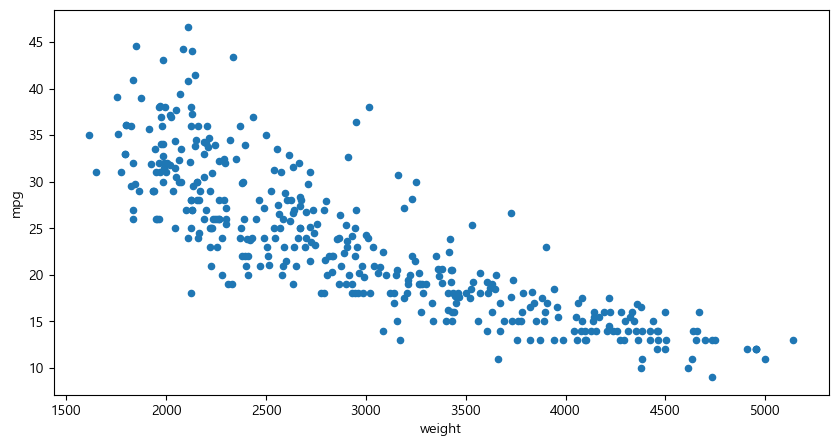

In [98]:
df[['mpg','weight']].plot(x = 'weight', y = 'mpg', kind = 'scatter', figsize = (10,5))
#판다스 내장 'scatter'산점도 그래프

In [99]:
df = pd.read_excel('excel/남북한_발전전력량.xlsx')
df2 = df.iloc[[0,3]]
df2 = df2.drop('발전 전력별', axis = 'columns')
df2.dtypes

남북한별    object
1990    object
1991    object
1992    object
1993    object
1994    object
1995    object
1996    object
1997    object
1998    object
1999    object
2000    object
2001    object
2002    object
2003    object
2004    object
2005    object
2006    object
2007    object
2008     int64
2009    object
2010    object
2011    object
2012     int64
2013     int64
2014     int64
2015     int64
2016     int64
2017     int64
2018     int64
2019     int64
2020     int64
2021     int64
2022     int64
dtype: object

In [100]:
df = pd.read_excel('excel/남북한_발전전력량.xlsx')
df2 = df.iloc[[0,3]]
df2 = df2.drop('발전 전력별', axis = 'columns')
df2 = df2.set_index('남북한별')
df2.index = ['north','south']
df2

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
north,277,263,247,221,231,230,213,193,170,186,...,221,216,190,239,235,249,238,239,255,264
south,1077,1186,1310,1444,1650,1847,2055,2244,2153,2393,...,5171,5220,5281,5404,5535,5706,5630,5522,5768,5944


In [107]:
df = pd.read_excel('excel/남북한_발전전력량.xlsx')
df['남북한별'] = df['남북한별'].ffill()

#멀티 인덱스명
df2 = df.set_index(['남북한별','발전 전력별'])
df2.loc[[('북한','합계'),('남한','합계')]]
df2.T.dtypes

남북한별  발전 전력별
북한    합계        object
      수력        object
      화력        object
남한    합계        object
      수력        object
      화력        object
      원자력       object
      대체에너지     object
dtype: object

In [102]:
A = ['80','90','78','67','93']
B = []
for i in A :
    i = int(i)
    B.append(i)
B

[80, 90, 78, 67, 93]

In [105]:
df3 = df2.T['north'].map(int)   #객체.map(함수) : 리스트인 객체를 함수에 원소하나씩 돌려서 반환한다.
df2.columns

for year in df2.columns:
    df2[year] = df2[year].map(int)
    
#df2.T.plot()

df2.T.plot(kind= 'bar',width = 0.8, figsize = (10,5))
#'bar' 막대그래프, width = 선굵기, stacked = 그래프 통합할지말지 T/F,

KeyError: 'north'

TypeError: no numeric data to plot

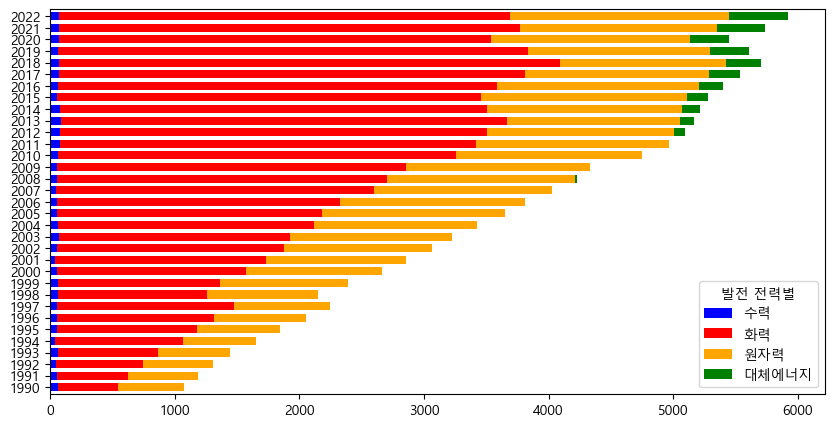

In [108]:
df3 = df.set_index(['남북한별','발전 전력별'])
df3 = df3.loc['남한']
df3 = df3.replace({'-':0})    #값에서 직접 치환
df3_T = df3.drop('합계').T
df3_T.plot(kind ='barh', width = 0.7, stacked = True, figsize = (10,5), color = ['blue','red','orange','green'])

df2.T.plot(kind='hist')

# car 그래프

In [116]:
car = pd.read_csv('csv/auto-mpg.csv')

columns = ['mpg','cylinders','weight','acceleration','model year','origin']
car2 = car[columns]
car2.corr()

,mpg,cylinders,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.896017,-0.505419,-0.348746,-0.562543
weight,-0.831741,0.896017,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.581024,0.205873,0.180662,1.000000


<Axes: xlabel='origin', ylabel='mpg'>

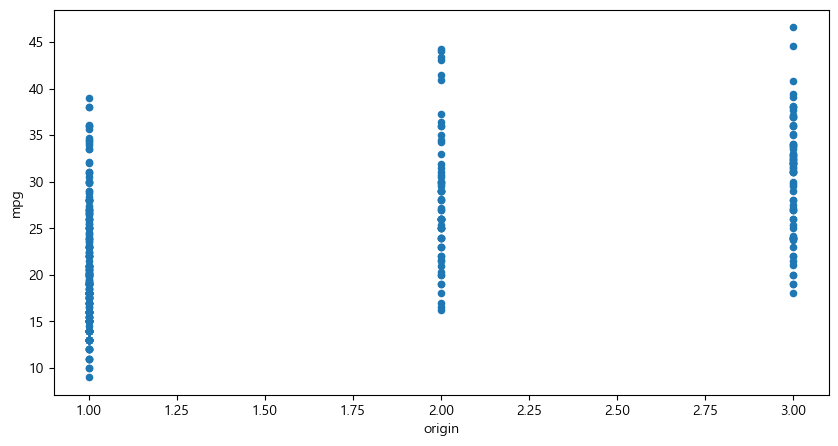

In [117]:
car2.plot(kind = 'scatter',x='origin',y='mpg',figsize=(10,5))

<Axes: xlabel='weight', ylabel='mpg'>

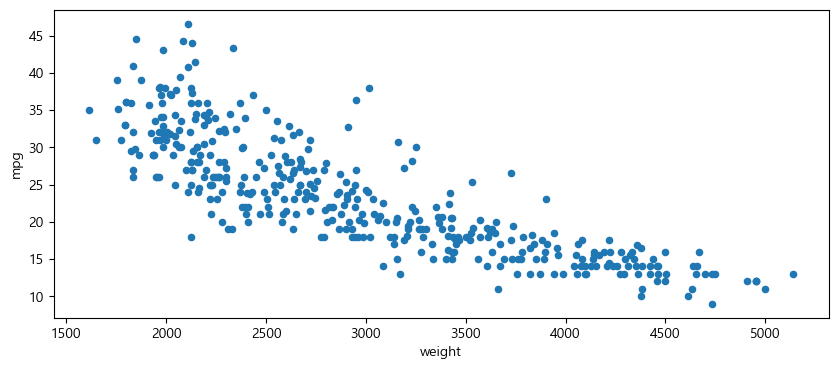

In [118]:
car2.plot(kind='scatter',x='weight',y='mpg',figsize=(10,4))

<Axes: >

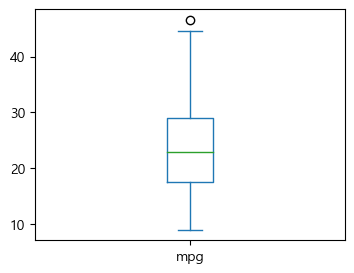

In [121]:
car2['mpg'].plot(kind = 'box', figsize=(4,3)) # 이상치 하나 발견

0       True
1       True
2       True
3       True
4       True
       ...  
393     True
394    False
395     True
396     True
397     True
Name: origin, Length: 398, dtype: bool

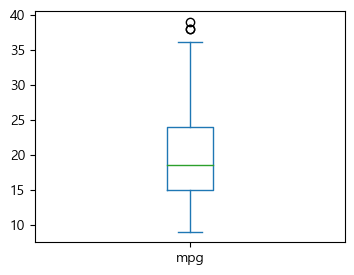

In [133]:
mask = car2['origin'] == 1  #마스킹 처리. 'origin' 원소가 1인 값만 추출한다.
car2[mask]['mpg'].plot(kind = 'box', figsize = (4,3))
mask

<Axes: >

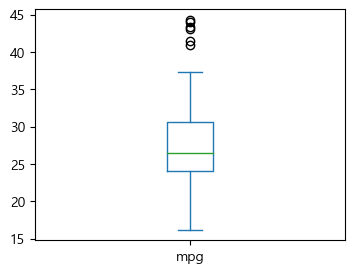

In [124]:
mask = car2['origin'] == 2
car2[mask]['mpg'].plot(kind = 'box', figsize = (4,3))

<Axes: >

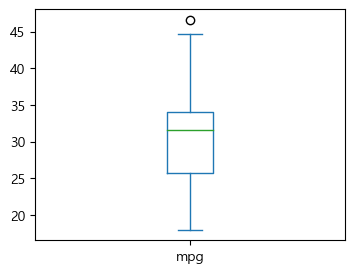

In [125]:
mask = car2['origin'] == 3
car2[mask]['mpg'].plot(kind = 'box', figsize = (4,3))

<Axes: ylabel='count'>

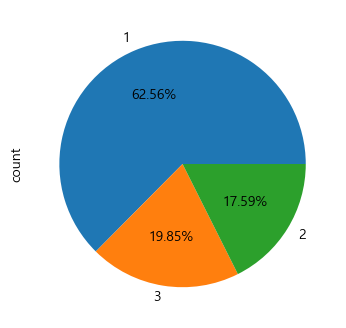

In [130]:
car2['origin'].value_counts().plot(kind = 'pie', figsize = (4,4), autopct = '%.2f%%') #소수점 아래 2 자리까지 퍼센트로 뽑아줌
#원형 그래프

# %.2f  : 소수점 2번째 자리까지 출력
# f열 포매팅 기법에서는 f'{변수:.2f}' 로 변수를 소수점 2번째 자리까지 문자열 출력